In [1]:
import keras
from sklearn.model_selection import train_test_split

# IMDB 데이터 셋
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.imdb.load_data(num_words=500)

In [2]:
# 훈련세트, 검증세트
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [3]:
# 패딩 처리 
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [8]:
# LSTM 순환신경망 층 구성 
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,)))
model.add(keras.layers.Embedding(500, 16))
model.add(keras.layers.LSTM(8, dropout=0.2, return_sequences=True)) # return_sequences 모든 은닉 상태 출력을 전달 
model.add(keras.layers.LSTM(8, dropout=0.2)) # 마지막 은닉상태만 출력 
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb =  keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
hist = model.fit(train_seq, train_target, epochs=100, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.6216 - loss: 0.6306 - val_accuracy: 0.7612 - val_loss: 0.4977
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7735 - loss: 0.4823 - val_accuracy: 0.7896 - val_loss: 0.4424
Epoch 3/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7999 - loss: 0.4438

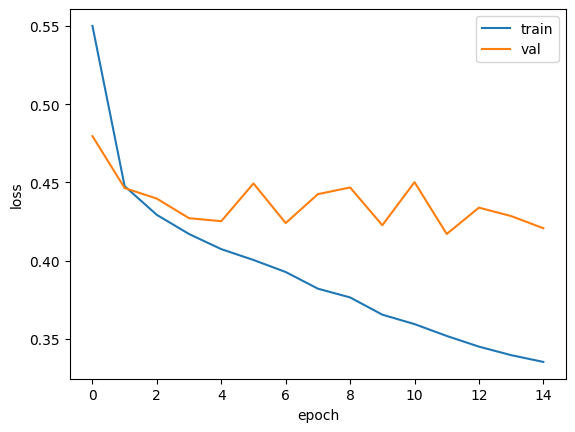

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()